<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/sub_clasases_codes/multiple_label_%ED%95%99%EC%8A%B5_%EB%A0%88%EC%9D%B4%EB%B8%946%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = '/content/drive/MyDrive/tree_test/'

In [ ]:
name = os.listdir(dir)
name

['잎을 무성하게 그린',
 '잎을 안 무성하게 그린',
 '잎이 없는',
 '잎이 큰',
 '잎이 안 큰',
 '윗쪽으로 뻗는',
 '윗쪽으로 안 뻗는',
 '열매있음',
 '열매없음']

In [ ]:
tree = glob.glob('/content/drive/MyDrive/tree_test/**')

In [ ]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '열매없음'))
_2.append(os.listdir(dir +'열매있음'))
_3.append(os.listdir(dir + '윗쪽으로 뻗는'))
_4.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
_5.append(os.listdir(dir + '잎을 무성하게 그린'))
_6.append(os.listdir(dir + '잎을 안 무성하게 그린'))

In [ ]:
total_list = []
total_list.append(os.listdir(dir + '열매없음'))
total_list.append(os.listdir(dir +'열매있음'))
total_list.append(os.listdir(dir + '윗쪽으로 뻗는'))
total_list.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
total_list.append(os.listdir(dir + '잎을 안 무성하게 그린'))
# x = set(total_list)
print(total_list)

[['잎211.png', '잎212.png', '잎218.png', '잎220.png', '잎214.png', '잎216.png', '잎219.png', '잎215.png', '잎222.png', '잎221.png', '잎213.png', '잎236.png', '잎223.png', '잎231.png', '잎230.png', '잎227.png', '잎237.png', '잎226.png', '잎235.png', '잎233.png', '잎224.png', '잎225.png', '잎228.png', '잎232.png', '잎234.png', '잎254.png', '잎242.png', '잎245.png', '잎251.png', '잎244.png', '잎252.png', '잎253.png', '잎250.png', '잎241.png', '잎247.png', '잎248.png', '잎240.png', '잎239.png', '잎246.png', '잎249.png', '잎243.png', '잎263.png', '잎258.png', '잎262.png', '잎257.png', '잎265.png', '잎256.png', '잎266.png', '잎259.png', '잎261.png', '잎260.png', '잎264.png', '잎267.png', '잎269.png', '잎268.png', '잎274.png', '잎279.png', '잎270.png', '잎276.png', '잎277.png', '잎280.png', '잎273.png', '잎271.png', '잎272.png', '잎275.png', '잎278.png', '잎288.png', '잎293.png', '잎291.png', '잎283.png', '잎282.png', '잎

In [ ]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['잎211.png', '잎212.png', '잎218.png', '잎220.png', '잎214.png', '잎216.png', '잎219.png', '잎215.png', '잎222.png', '잎221.png', '잎213.png', '잎236.png', '잎223.png', '잎231.png', '잎230.png', '잎227.png', '잎237.png', '잎226.png', '잎235.png', '잎233.png', '잎224.png', '잎225.png', '잎228.png', '잎232.png', '잎234.png', '잎254.png', '잎242.png', '잎245.png', '잎251.png', '잎244.png', '잎252.png', '잎253.png', '잎250.png', '잎241.png', '잎247.png', '잎248.png', '잎240.png', '잎239.png', '잎246.png', '잎249.png', '잎243.png', '잎263.png', '잎258.png', '잎262.png', '잎257.png', '잎265.png', '잎256.png', '잎266.png', '잎259.png', '잎261.png', '잎260.png', '잎264.png', '잎267.png', '잎269.png', '잎268.png', '잎274.png', '잎279.png', '잎270.png', '잎276.png', '잎277.png', '잎280.png', '잎273.png', '잎271.png', '잎272.png', '잎275.png', '잎278.png', '잎288.png', '잎293.png', '잎291.png', '잎283.png', '잎282.png', '잎2

In [ ]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
_3 = np.concatenate(_3).tolist()
_4 = np.concatenate(_4).tolist()
_5 = np.concatenate(_5).tolist()
_6 = np.concatenate(_6).tolist()

In [ ]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [ ]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
df3 = pd.DataFrame({
    '_3' : _3
})
df4 = pd.DataFrame({
    '_4' : _4
})
df5 = pd.DataFrame({
    '_5' : _5
})
df6 = pd.DataFrame({
    '_6' : _6
})

In [ ]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')
result = pd.merge(result,df6, how='left', left_on='imgs', right_on='_6')

In [ ]:
result = result.fillna(0)

In [ ]:
result

,imgs,_1,_2,_3,_4,_5,_6
0,잎211.png,잎211.png,0,0,0,0,0
1,잎212.png,잎212.png,0,0,0,0,0
2,잎218.png,잎218.png,0,0,0,0,0
3,잎220.png,잎220.png,0,0,0,0,0
4,잎214.png,잎214.png,0,0,0,0,0
...,...,...,...,...,...,...,...
492,전체620.png,0,0,0,0,0,전체620.png
493,전체621.png,0,0,0,0,0,전체621.png
494,전체619.png,0,0,0,0,0,전체619.png
495,전체626.png,0,0,0,0,0,전체626.png


In [ ]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
result['_3'] = result['_3'].apply(binary)
result['_4'] = result['_4'].apply(binary)
result['_5'] = result['_5'].apply(binary)
result['_6'] = result['_6'].apply(binary)

In [ ]:
result

,imgs,_1,_2,_3,_4,_5,_6
0,잎211.png,1,0,0,0,0,0
1,잎212.png,1,0,0,0,0,0
2,잎218.png,1,0,0,0,0,0
3,잎220.png,1,0,0,0,0,0
4,잎214.png,1,0,0,0,0,0
...,...,...,...,...,...,...,...
492,전체620.png,0,0,0,0,0,1
493,전체621.png,0,0,0,0,0,1
494,전체619.png,0,0,0,0,0,1
495,전체626.png,0,0,0,0,0,1


In [ ]:
result.columns = ['imgs','열매없음', '열매있음','윗쪽으로 뻗는','윗쪽으로 안 뻗는','잎을 무성하게 그린','잎을 안 무성하게 그린']

In [ ]:
result

,imgs,열매없음,열매있음,윗쪽으로 뻗는,윗쪽으로 안 뻗는,잎을 무성하게 그린,잎을 안 무성하게 그린
0,잎211.png,1,0,0,0,0,0
1,잎212.png,1,0,0,0,0,0
2,잎218.png,1,0,0,0,0,0
3,잎220.png,1,0,0,0,0,0
4,잎214.png,1,0,0,0,0,0
...,...,...,...,...,...,...,...
492,전체620.png,0,0,0,0,0,1
493,전체621.png,0,0,0,0,0,1
494,전체619.png,0,0,0,0,0,1
495,전체626.png,0,0,0,0,0,1


In [ ]:
result.iloc[227:229]

,imgs,열매없음,열매있음,윗쪽으로 뻗는,윗쪽으로 안 뻗는,잎을 무성하게 그린,잎을 안 무성하게 그린
227,잎276.png,1,0,1,0,0,0
228,잎281.png,1,0,1,0,0,0


In [ ]:
image_directory = '/content/drive/MyDrive/test_total_image/'

In [ ]:
SIZE = 200
X_dataset = []  
for i in tqdm(range(result.shape[0])):
    img = image.load_img(image_directory + result['imgs'][i], target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)
    
X = np.array(X_dataset)

100%|██████████| 497/497 [00:04<00:00, 117.09it/s]


In [ ]:
X.shape

(497, 200, 200, 3)

In [ ]:
print(y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [ ]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(result.drop(['imgs'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 16)      1216      
                                                                 
 batch_normalization_4 (Batc  (None, 196, 196, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 98, 98, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 32)      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/100
6/6 [==============================] - 4s 170ms/step - loss: 0.9530 - accuracy: 0.1556 - val_loss: 0.6866 - val_accuracy: 0.2733
Epoch 2/100
6/6 [==============================] - 1s 100ms/step - loss: 0.8455 - accuracy: 0.2421 - val_loss: 0.6005 - val_accuracy: 0.0800
Epoch 3/100
6/6 [==============================] - 1s 99ms/step - loss: 0.7846 - accuracy: 0.2363 - val_loss: 0.5883 - val_accuracy: 0.2867
Epoch 4/100
6/6 [==============================] - 1s 98ms/step - loss: 0.7169 - accuracy: 0.2565 - val_loss: 0.5848 - val_accuracy: 0.1800
Epoch 5/100
6/6 [==============================] - 1s 98ms/step - loss: 0.6722 - accuracy: 0.2334 - val_loss: 0.5577 - val_accuracy: 0.1867
Epoch 6/100
6/6 [==============================] - 1s 100ms/step - loss: 0.6765 - accuracy: 0.2738 - val_loss: 0.5615 - val_accuracy: 0.1800
Epoch 7/100
6/6 [==============================] - 1s 99ms/step - loss: 0.6091 - accuracy: 0.3084 - val_loss: 0.5445 - val_accuracy: 0.2000
Epoch 8/100
6/6 [

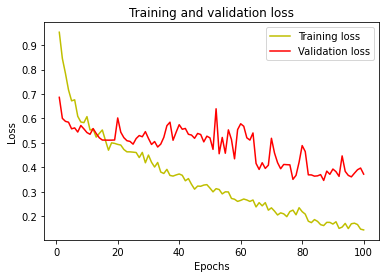

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

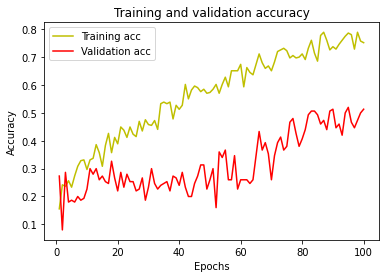

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])
  test_accuracy_report(model)

In [ ]:
y_test

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
 

In [ ]:
predicted = model.predict(X_test)
y_pred=[]
for sample in  predicted:
  y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
y_pred = np.array(y_pred)
y_pred

5/5 [==============================] - 0s 14ms/step


array([[1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4533333333333333

In [ ]:
print("Actual \n", y_test)
print("\nPredicted \n",y_pred)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 86,  22],
        [ 20,  22]],

       [[111,   3],
        [  5,  31]],

       [[120,   6],
        [ 12,  12]],

       [[129,   7],
        [  3,  11]],

       [[ 86,  17],
        [ 15,  32]],

       [[ 97,   9],
        [ 18,  26]]])

In [ ]:
from sklearn.metrics import classification_report

label_names = ['열매없음',	'열매있음',	'윗쪽으로 뻗는','윗쪽으로 안 뻗는',	'잎을 무성하게 그린',	'잎을 안 무성하게 그린']

print(classification_report(y_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

        열매없음       0.50      0.52      0.51        42
        열매있음       0.91      0.86      0.89        36
     윗쪽으로 뻗는       0.67      0.50      0.57        24
   윗쪽으로 안 뻗는       0.61      0.79      0.69        14
  잎을 무성하게 그린       0.65      0.68      0.67        47
잎을 안 무성하게 그린       0.74      0.59      0.66        44

   micro avg       0.68      0.65      0.66       207
   macro avg       0.68      0.66      0.66       207
weighted avg       0.68      0.65      0.66       207
 samples avg       0.58      0.59      0.57       207



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
img = image.load_img('ddlj.jpg', target_size=(SIZE,SIZE,3))
img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

